# **<a>Assignment 2: Reinforcement Learning**
**Name :** Karim Gamal Mahmoud Mohamed

**ID : 21kgmm**

>**CISC 856, Winter, 2022**

>**Due Friday, May 20, 2022**

> ### Windy Grid World (Sutton & Barto, pg. 130,131)


> Consider the game depicted in the following diagram:

> ![](https://img-blog.csdnimg.cn/20210409215142880.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L1daWF9IZWxsbw==,size_16,color_FFFFFF,t_70#pic_center)

> You are to implement several algorithms to solve this problem:

>1. Sarsa
2. Q-learning


> Compare all solutions in terms of the optimal policies and episodes necessary for convergence. Select
the best values for $\varepsilon$ and $\alpha$ for each case. If they are different, discuss why. 

> Re-solve the `windy gridworld` task with `King’s moves`, assuming that the effect of the wind, if there is
any, is stochastic, sometimes varying by 1 from the mean values given for each column. 

> That is, a third
of the time you move exactly according to these values, as in the previous exercise, but also a third of
the time you move one cell above that, and another third of the time you move one cell below that. 

> For
example, if you are one cell to the right of the goal and you move left, then one-third of the time you
move one cell above the goal, one-third of the time you move two cells above the goal, and one-third of
the time you move to the goal. **YOU SHOULD ONLY USE THIS APPROACH.**

> Mathematically, when the wind is defined by w, the location of the agent in y after the execution of the
action without stochastic wind will be `y = a(s) + w`. Then, the stochastic output y` will be:



> 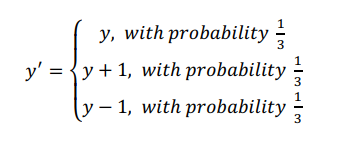

> ## <a> Define World Class 

> Let us define the gridWorld class with settings that are considered.

> First of all, we need to define a “World” to represent the windy grid world, and to determine where the agent can move to and how many rewards it will get.

> ### Import Libraries

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt 

> If kingBool is true, the agent can use King's moves, else it can only move north, south, east and west.

In [2]:
class World(object):
    def __init__(self, kingBool):
        self.gridthWidth = 10
        self.gridHeight = 7
        self.startPos = (0, 3)  # (column, row)
        self.currentPos = self.startPos  # init the current position
        self.goalPos = (7, 3)
        self.windVals = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]
        self.king = kingBool

> `movePosition` function for moving the agent to a new position based on the chosen action, and return the new position and the reward

In [3]:
class World(World):
    def movePosition(self, action): 
        newPos = np.add(list(self.currentPos), list(action))

        if (self.king):  # if the agent is using King's Moves, the wind is stochastic
            windProbability = np.random.randint(1, 3)  # integers in the range of [1, 3]
        else:
            windProbability = 1

        newPos[1] = newPos[1] + self.windVals[
            list(self.currentPos)[0]]  # Adjust the agent's position up and down according to the wind

        if (windProbability == 2):
            newPos[1] = newPos[1] - 1  # The wind blew the agent a cell down
        elif (windProbability == 3):
            newPos[1] = newPos[1] + 1  # The wind blew the agent two cells up

        # if the agent goes outside the gridworld, make the new position be just inside where it would have gone off
        if (newPos[1] < 0):
            newPos[1] = 0
        elif (newPos[1] >= self.gridHeight):
            # print("temp is" + str(temp))
            newPos[1] = self.gridHeight - 1

        if (newPos[1] == list(self.goalPos)[1] and newPos[0] == list(self.goalPos)[0]):
            reward = 1
        else:
            reward = -1

        return [(newPos[0], newPos[1]), reward]


> We need to build a function to prevent the agent from moving off the grid.

In [4]:
class World(World):
    def allowedActionsFromPos(self, position):  
        allowedMoves = []
        if (position[0] != 0):
            allowedMoves.append((-1, 0))
        if (position[0] != self.gridthWidth - 1):
            allowedMoves.append((1, 0))
        if (position[1] != self.gridHeight - 1):
            allowedMoves.append((0, 1))
        if (position[1] != 0):
            allowedMoves.append((0, -1))
        
        # diagonal actions
        if (self.king):  
            allowedMoves.append((1, 1))
            allowedMoves.append((-1, -1))
            allowedMoves.append((1, -1))
            allowedMoves.append((-1, 1))

            # bottom left(0, 0)
            if (position == (0, 0)):  
                if ((-1, 0) in allowedMoves):
                    allowedMoves.remove((-1, 0))
                if ((0, -1) in allowedMoves):
                    allowedMoves.remove((0, -1))
                allowedMoves.remove((-1, -1))
                allowedMoves.remove((-1, 1))
                allowedMoves.remove((1, -1))

            # top left
            elif (position == (0, self.gridHeight - 1)):  
                if ((0, 1) in allowedMoves):
                    allowedMoves.remove((0, 1))
                if ((-1, 0) in allowedMoves):
                    allowedMoves.remove((-1, 0))
                allowedMoves.remove((1, 1))
                allowedMoves.remove((-1, 1))
                allowedMoves.remove((-1, -1))

            # bottom right
            elif (position == (self.gridthWidth - 1, 0)):  
                if ((1, 0) in allowedMoves):
                    allowedMoves.remove((1, 0))
                if ((0, -1) in allowedMoves):
                    allowedMoves.remove((0, -1))
                allowedMoves.remove((1, 1))
                allowedMoves.remove((1, -1))
                allowedMoves.remove((-1, -1))

             # top right
            elif (position == (self.gridthWidth - 1, self.gridHeight - 1)): 
                if ((0, 1) in allowedMoves):
                    allowedMoves.remove((0, 1))
                if ((1, 0) in allowedMoves):
                    allowedMoves.remove((1, 0))
                allowedMoves.remove((1, 1))
                allowedMoves.remove((1, -1))
                allowedMoves.remove((-1, 1))
            else:
                if (position[0] == self.gridthWidth - 1):
                    if ((1, 0) in allowedMoves):
                        allowedMoves.remove((1, 0))
                    allowedMoves.remove((1, 1))
                    allowedMoves.remove((1, -1))
                if (position[0] == 0):
                    if ((-1, 0) in allowedMoves):
                        allowedMoves.remove((-1, 0))
                    allowedMoves.remove((-1, 1))
                    allowedMoves.remove((-1, -1))
                if (position[1] == self.gridHeight):
                    if ((0, 1) in allowedMoves):
                        allowedMoves.remove((0, 1))
                    allowedMoves.remove((1, 1))
                    allowedMoves.remove((-1, 1))
                if (position[1] == 0):
                    if ((0, -1) in allowedMoves):
                        allowedMoves.remove((0, -1))
                    allowedMoves.remove((1, -1))
                    allowedMoves.remove((-1, -1))

        return allowedMoves

> ## <a> Define Agent Class 

> Second of all, we need to create a class named “Agent”, which is the core part is the implementation of Sarsa and Q-learning, besides, the creation of Q-Table and ϵ − greedy \epsilon-greedy ϵ−greedy policy are also included in this part. 



In [5]:
class Agent(object):
    def __init__(self, a, e, world: World):
        self.alpha = a  # learning rate
        self.epsilon = e  # the probability you want to explore
        self.world = world
        self.gamma = 0.9 # the same as in the book
        self.Q_values = self.createQTables()
        self.numOfSteps = 0


> It’s worth noticing that the Q-Tables is a two dimension dictionary whose form can be formulated as:


> `{‘position1’:{‘action1’: value1, ‘action2’: value2}, ‘position2’:{‘action1’: value1, ‘action2’: value2}, …}`

In [6]:
class Agent(Agent):
    def createQTables(self):
        # dictionary where each key is a state that holds a different number of possible actions, each which has a q-value
        QTable = {}  
        for x in range(self.world.gridthWidth):
            for y in range(self.world.gridHeight):
                position = (x, y)
                QTable[position] = {}  # all the posible actions in the current state
                allowedActions = self.world.allowedActionsFromPos(position)
                for action in allowedActions:
                    QTable[position][action] = 0
        return QTable

    def getBestAction(self, position):
        maxVal = np.NINF  # Negative infinity
        maxAction = None
        for action, value in self.Q_values[position].items():
            if value > maxVal:
                maxVal = value
                bestAction = action
        return bestAction

    def chooseAction(self, position):
        
        # get all allowed actions in the state
        allowedActions = list(self.Q_values[position].keys())  
        
        # initialize it, and update in loop later
        possibleNextState = self.world.startPos  
        action = None  # initializing the return

        # Random sample values subject to uniform distribution of "0~1". The value range of the random sample is [0,1), excluding 1.
        randomNum = np.random.rand()  
        # this is epsilon-greedy policy
        if (randomNum < self.epsilon):
            subOptimalActionChoiceIndex = np.random.randint(0, len(allowedActions) - 1)  # chooes a random action
            action = allowedActions[subOptimalActionChoiceIndex]
        else:
            action = self.getBestAction(position)
        possibleNextState = np.add(list(position), list(action))
        temp = possibleNextState[1] - self.world.windVals[list(possibleNextState)[0]]

        if (temp >= 0):
            possibleNextState[1] = temp

        possibleNextState = (possibleNextState[0], possibleNextState[1])
        return action


> ## <center> <a> On-policy vs. off-policy reinforcement learning

> As the main objective in reinforcement learning problems is to create a policy (i.e., plan of action) that leads to the best outcome (highest possible reward), algorithms would estimate the return (future rewards) and behave (i.e., pick their actions) based on that estimation. 

> The difference between an on-policy and off-policy algorithm is simply the way they behave (pick their actions) relative to the way they 'think' they behave when estimating their returns.

> In both on-policy and off-policy algorithms, there exist a policy that guides an agent's behavior, i.e., the algorithm picks an action for the agent to execute. The way these actions are picked is dependent on the algorithm's return estimate for each state-action value pair, Q . 

> That is, when in a particular state S, the value Q generated by taking a particular action 'A' affects the algorithms' decision on whether to pick 'A' . An example method in selecting 'A' is the greedy policy, where an algorithm would find the 'A' that gives the highest 'Q' value and pick that as the action to execute.

The following table show the difference between SARSA and Q-learning:

|SARSA|Q-learning|
|---|---|
|On-policy|Off-policy|
|Chooses an action → not necessarily the best one → sees the result|Chooses an action → sees the result|
|Updates its value function with the knowledge of the result|Updates its value function with a different action (greedy)|
|Converges eventually|No convergence guarantees|
|Typically converges slower than Q-learning|Often faster and better than SARSA|

> ### <a> Sarsa On-Policy TD Control </a>

> Baseline for epsilon greedy version of Sarsa.

> The pseudo code of SARSA prediction of Q(s,a) is given on page 154 of [Sutton & Barto](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf) and is shown below.


> ![](https://introrl.readthedocs.io/en/latest/_images/sarsa_td_control_sutton.jpg)

> [Source](https://introrl.readthedocs.io/en/latest/_static/colorized_scripts/td_funcs/sarsa_epsilon_greedy.html)

In [7]:
class Agent(Agent):
    def Sarsa(self):
        self.world.currentPos = self.world.startPos
        visited = []  # initialize
        actionsTaken = []
        visited.append(self.world.startPos)
        chosenAction = self.chooseAction(self.world.currentPos)
        newPosAndReward = None  # initialize
        converged = True
        total_no_reward = 0

        while True:  # loop for each step of the episode
            # take action A, observe R and S'
            newPosAndReward = self.world.movePosition(chosenAction)  # [(column, row), reward]
            newPosition = newPosAndReward[0]
            reward = newPosAndReward[1]
            visited.append(newPosition)
            actionsTaken.append(chosenAction)
            self.numOfSteps = self.numOfSteps + 1

            # choose A' from S' using epsilon-greedy policy
            nextAction = self.chooseAction(newPosition)

            # update Q-value of the current position
            oldQ = self.Q_values[self.world.currentPos][chosenAction]
            self.Q_values[self.world.currentPos][chosenAction] += self.alpha * ( reward + self.gamma * self.Q_values[newPosition][nextAction] - self.Q_values[self.world.currentPos][chosenAction])

            if (abs(oldQ - self.Q_values[self.world.currentPos][chosenAction]) > self.epsilon):
                converged = False

            # advanced to the next state and action
            self.world.currentPos = newPosition
            chosenAction = nextAction

            if (self.world.currentPos == self.world.goalPos):  # next position is the goal
                break

            # the summition for every new reward
            total_no_reward = total_no_reward + reward

        return converged, visited, actionsTaken, total_no_reward

> ### <a> Q-Learning: Off-Policy TD Control </a>

> The Q-learning pseudo code is given on page 157 of [Sutton & Barto](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)

> ![](https://introrl.readthedocs.io/en/latest/_images/qlearning_pseudocode_sutton.jpg)

> [Source](https://introrl.readthedocs.io/en/latest/_static/colorized_scripts/td_funcs/qlearning_epsilon_greedy.html)

In [8]:
class Agent(Agent):
    def QLearning(self):
        self.world.currentPos = self.world.startPos
        visited = []  # initialize
        actionsTaken = []
        visited.append(self.world.startPos)
        newPosAndReward = None  # initialize
        converged = True
        total_no_reward = 0

        while True:
            # choose A from S using the epsilon-greedy policy
            chosenAction = self.chooseAction(self.world.currentPos)
            # take A and observe R and S'
            newPosAndReward = self.world.movePosition(chosenAction)
            newPosition = newPosAndReward[0]
            reward = newPosAndReward[1]
            visited.append(newPosition)
            actionsTaken.append(chosenAction)
            self.numOfSteps = self.numOfSteps + 1
            # find the best action from S'
            bestAction = self.getBestAction(newPosition)

            oldQ = self.Q_values[self.world.currentPos][chosenAction]
            self.Q_values[self.world.currentPos][chosenAction] += self.alpha * (reward + self.gamma * self.Q_values[newPosition][bestAction] - self.Q_values[self.world.currentPos][chosenAction])

            if (abs(oldQ - self.Q_values[self.world.currentPos][chosenAction]) > self.epsilon):
                converged = False

            # advance to the next state
            self.world.currentPos = newPosition

            if (self.world.currentPos == self.world.goalPos):
                break
            
            # the summition for every new reward
            total_no_reward = total_no_reward + reward
        return converged, visited, actionsTaken, total_no_reward

> ## <a> The Results

In [9]:
def path_method(global_var=[(0,0)]):
  if len(global_var) != 0:
    # we will use zip fun. to split the tuple into two lists
    list1, list2 = zip(*global_var)
    list1 = [x +0.5 for x in list1]
    list2 = [x +0.5 for x in list2]

    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1, 1, 1)
    # plot the optimal path from the start to the goal
    ax.plot(list1, list2)   
    ax.plot(list1, list2,'o')   
    # the final state
    ax.plot(7.5, 3.5,'rD', linewidth=2, markersize=24)   
    # the start state
    ax.plot(.5, 3.5,'D', linewidth=2, markersize=24)  

    # mjor and minor range
    major_ticks = np.arange(0, 11, 1)
    minor_ticks = np.arange(0, 8, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(major_ticks, minor=True)
    ax.set_yticks(minor_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')
    plt.suptitle("The Optimal Policy", fontsize=14, fontweight='bold')
    plt.gca().patch.set_facecolor('0.9')
    plt.show()
  else:
    print('********** empty list ', len(global_var))


> A sub function form the main function for displaying the results.

In [10]:
def sub_fun(alpha_ , epsilon_ ,T_F_King_moves, episodes_range, Policy_, line_, cancel_path_method = False):
  testWorld = World(T_F_King_moves)
  testAgent = Agent(alpha_, epsilon_, testWorld)
  timeSteps = [0]
  episodes = [0]
  convergedX = []
  convergedY = []
  alreadyConverged = False
  for x in range(episodes_range):  # the max number of episodes
      if Policy_ == 'sarsa' : 
        result = testAgent.Sarsa()
      else:
        result = testAgent.QLearning()
      timeSteps.append(testAgent.numOfSteps)
      episodes.append(x)
      if (result[0] and not alreadyConverged):
          print("Found the optimal policy using ",Policy_," . The path is :")
          print(result[1])
          print('________________________________________________________\n')
          # global_var = result[1]
          if cancel_path_method == False:
            path_method(result[1])
          
          print("\n The actions taken on that path are ")
          print(result[2])
          print('________________________________________________________\n')
          print("The Total No. of Rewards : ",result[3])

          convergedX.append(x)
          convergedY.append((testAgent.numOfSteps))
          alreadyConverged = True

  print('(No. of Episodes , Time to converge)', '( ', convergedX , ' , ',convergedY , ' )')
  # plt.figure(figsize=(10,5))
  plt.plot(timeSteps, episodes, line_,  label= Policy_ + ' with epsilon : ' + str(epsilon_))
  # plt.figure(figsize=(10,5))
  plt.plot(convergedY, convergedX, 'ro',label= 'The convergence point for '+Policy_)
  print('________________________________________________________\n')



> The main funciton for displaying and comparing the results

In [11]:
def results_method(alpha_, epsilon_, Policy_ = 'sarsa', T_F_King_moves = False , episodes_range = 200, line_ = 'c--'):
  if Policy_ == 'both':
    for Policy_ ,line_ in zip(['sarsa','QLearning'], ['-c', '-b']):
      sub_fun(alpha_ , epsilon_ ,T_F_King_moves, episodes_range, Policy_, line_, cancel_path_method= True)
    plt.suptitle('sarsa & QLearning')
  else:
      sub_fun(alpha_ , epsilon_ ,T_F_King_moves, episodes_range, Policy_, line_)
      plt.suptitle(Policy_)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xlabel("Total Timesteps")
  plt.ylabel("Episodes")
  plt.show()

> #### <a> SARSA

> Let's start with `SARSA` algorithm with different α (ALPHA) and ε (EPSILON) values.

> The α (ALPHA) and ε (EPSILON) values used are the same as in the book, though different epsilon values will be compared later on.

> Let's view the learned policy after 100 time steps of training. The greedy policy will be used as we want to test if the optimal policy was learned.

(No. of Episodes , Time to converge) (  []  ,  []  )
________________________________________________________



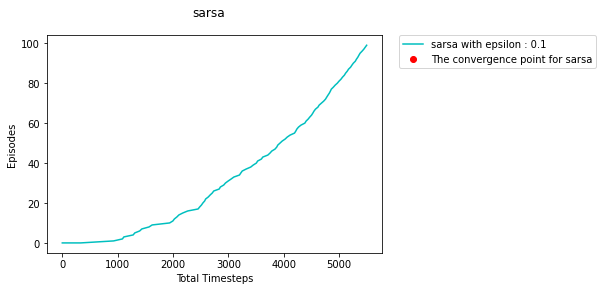

In [12]:
# Sarsa
results_method(0.5, 0.1 ,Policy_ = 'sarsa', episodes_range = 100, line_ = '-c')

> **Notes on the previous cell** : 

> Of course, `100` steps is not enough to learn the optimal policy and the agent gets stuck in a loop. Let's try with `1000` time steps of training.

> ### Initial state of the Windy Gridworld. <br/>

> ### <center> <font color='green'>Start State</font> & <font color='red'>Final State</font>

> It looks like Italy Flag 🇮 😃

<hr/>

Found the optimal policy using  sarsa  . The path is :
[(0, 3), (1, 3), (2, 3), (3, 3), (4, 4), (5, 5), (6, 6), (7, 6), (8, 6), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (8, 2), (7, 3)]
________________________________________________________



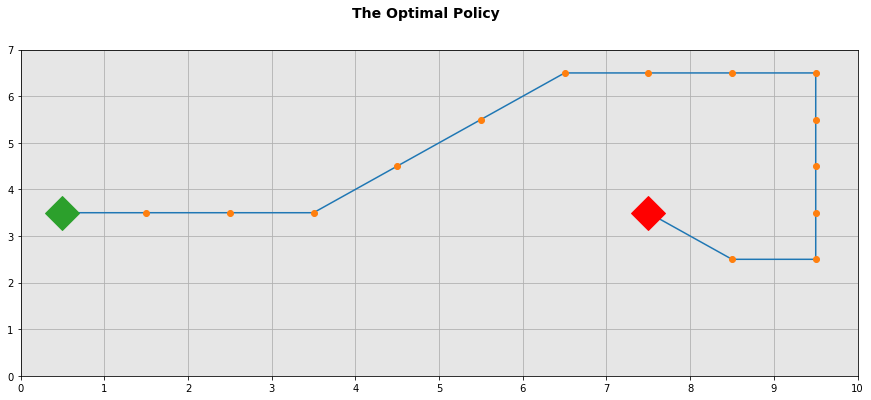


 The actions taken on that path are 
[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, -1), (0, -1), (0, -1), (0, -1), (-1, 0), (-1, 0)]
________________________________________________________

The Total No. of Rewards :  -14
(No. of Episodes , Time to converge) (  [778]  ,  [18540]  )
________________________________________________________



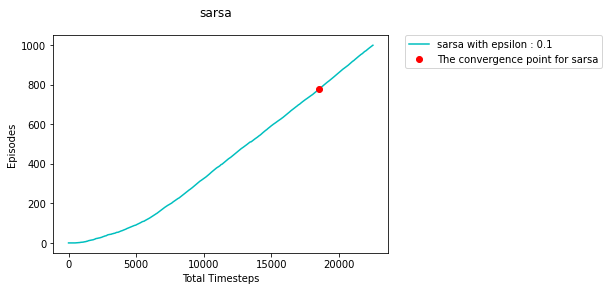

In [22]:
# Sarsa
results_method(0.5, 0.1 ,Policy_ = 'sarsa', episodes_range = 1000, line_ = '-c')

> **Notes on the previous cell** : 

> As we can see The agent converges after `778` episodes , with total time steps `18540` and gets total rewards = `-14`

> #### <a> Q-Learning

> We can try the same experiment with the `Q-learning` algorithm:

Found the optimal policy using  QLearning  . The path is :
[(0, 3), (1, 3), (2, 3), (3, 3), (4, 4), (5, 5), (6, 6), (7, 6), (8, 6), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (8, 2), (7, 3)]
________________________________________________________



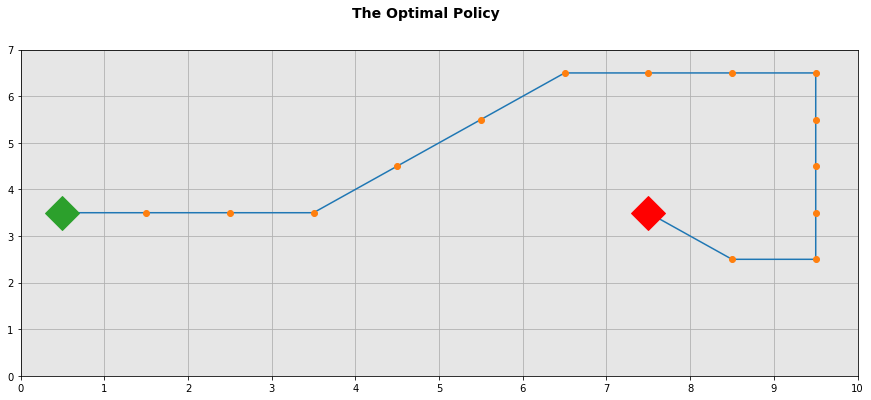


 The actions taken on that path are 
[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, -1), (0, -1), (0, -1), (0, -1), (-1, 0), (-1, 0)]
________________________________________________________

The Total No. of Rewards :  -14
(No. of Episodes , Time to converge) (  [112]  ,  [5105]  )
________________________________________________________



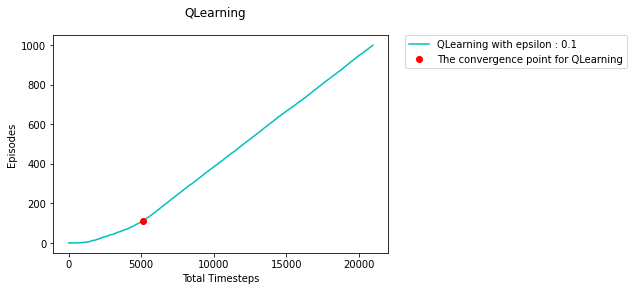

In [21]:
# QLearning
results_method(0.5, 0.1 ,Policy_ = 'QLearning', episodes_range = 1000, line_ = '-c')

> **Notes on the previous cell** : 

> As we can see The agent converges after `112` episodes , with total time steps `5105` and gets total rewards = `-14`

> ### <a> <center> SARSA vs QLearning

> ### Now lets verify which algorithm learns the optimal policy the fastest.

Found the optimal policy using  sarsa  . The path is :
[(0, 3), (0, 2), (1, 2), (2, 2), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 6), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (8, 2), (7, 3)]
________________________________________________________


 The actions taken on that path are 
[(0, -1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, -1), (0, -1), (0, -1), (0, -1), (-1, 0), (-1, 0)]
________________________________________________________

The Total No. of Rewards :  -15
(No. of Episodes , Time to converge) (  [264]  ,  [8679]  )
________________________________________________________

Found the optimal policy using  QLearning  . The path is :
[(0, 3), (1, 3), (2, 3), (3, 3), (4, 4), (5, 5), (6, 6), (7, 6), (8, 6), (9, 6), (9, 5), (9, 4), (9, 3), (9, 4), (9, 3), (9, 2), (8, 2), (7, 3)]
________________________________________________________


 The actions taken on that path are 
[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1,

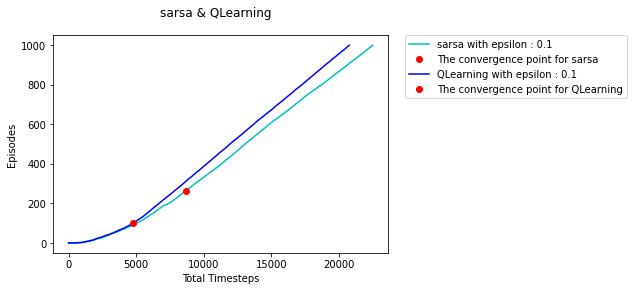

In [15]:
# SARSA & QLearning
results_method(0.5, 0.1 ,Policy_ = 'both', episodes_range = 1000, line_ = '-c')

> Results will vary due to randomness, but usually after ~4500 time steps, the learned policy is optimal and finishes the episode.

 >
  .               |SARSA              | Q-Learning 
-------------------|-------------------|------------------
No. of episodes    |   `264`             | `101` 
Total Timesteps    | `8679`             |   `4797` 
The Total Rewards    |   `-15`      | `-16` 



> 

Found the optimal policy using  sarsa  . The path is :
[(0, 3), (1, 3), (2, 3), (3, 3), (4, 4), (5, 5), (6, 6), (7, 6), (8, 6), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (8, 2), (7, 3)]
________________________________________________________


 The actions taken on that path are 
[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, -1), (0, -1), (0, -1), (0, -1), (-1, 0), (-1, 0)]
________________________________________________________

The Total No. of Rewards :  -14
(No. of Episodes , Time to converge) (  [277]  ,  [11323]  )
________________________________________________________

Found the optimal policy using  QLearning  . The path is :
[(0, 3), (1, 3), (2, 3), (2, 2), (3, 2), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (6, 6), (7, 6), (8, 6), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (8, 2), (7, 3)]
________________________________________________________


 The actions taken on that path are 
[(1, 0), (1, 0), (0, -1), (1, 0), (0, -1), (1, 0), (1, 0), (1, 0), (

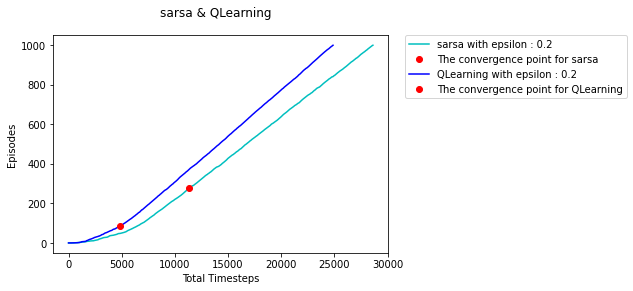

In [23]:
# SARSA & QLearning
results_method(0.5, 0.2 ,Policy_ = 'both', episodes_range = 1000, line_ = '-c')

 >
  .               |SARSA              | Q-Learning 
-------------------|-------------------|------------------
No. of episodes    |   `277`             | `86` 
Total Timesteps    | `11323`             |   `4828` 
The Total Rewards    |   `-14`      | `-18` 



> **Notes on the previous cell** : 

> Here we compare two ε values for each algorithm. ε = 0.1 is the value used in the book. We added ε = 0.2 to compare performance.

> As we can see, for the same epsilon value, Q-learning performs better than Sarsa on the Windy Gridworld. It learns the optimal policy quicker than Sarsa.

> Also, `ε = 0.1` gives better results, as is expected. `ε = 0.2` doesn't seem to give any major advantage in the early phase of learning, as could of been the case. 

> Maybe a higher ε value would make a difference, but then again, in the early phase, the greedy actions are not set in stone yet as the optimal policy is far from learned.

> ### <a> SARSA with King's move

> In `SARSA` with King's move , we add more actions that can be chosen by the agent and test how this affects the results.


Found the optimal policy using  sarsa  . The path is :
[(0, 3), (1, 2), (2, 1), (3, 0), (4, 0), (5, 1), (6, 0), (7, 2), (7, 3)]
________________________________________________________



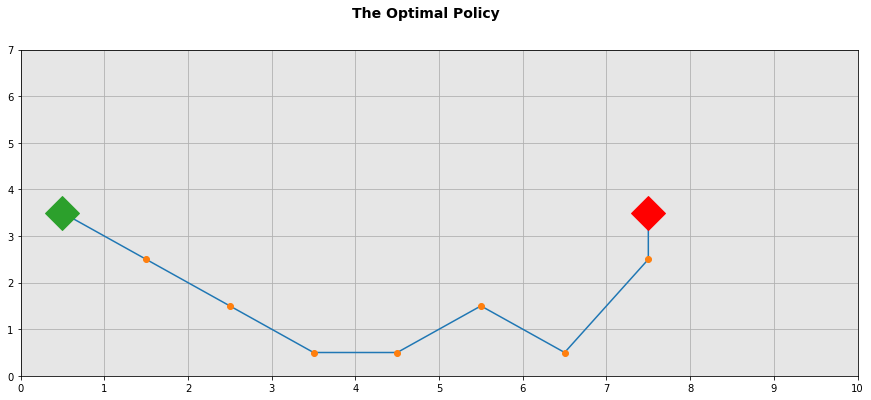


 The actions taken on that path are 
[(1, 0), (1, -1), (1, -1), (1, 0), (1, 0), (1, -1), (1, 1), (0, -1)]
________________________________________________________

The Total No. of Rewards :  -7
(No. of Episodes , Time to converge) (  [170]  ,  [6163]  )
________________________________________________________



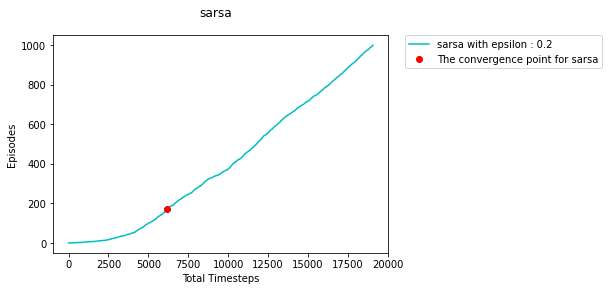

In [50]:
# SARSA with King's move
# we will set T_F_King_moves = True which can more actions that can be chosen.
results_method(0.4, 0.2 ,Policy_ = 'sarsa', T_F_King_moves = True, episodes_range = 1000, line_ = '-c')

> **Notes on the previous cell** : 

> As we can see i decreased the No. of alpha to converge with the same epsilon ,The learned policy is different than the with only the four basic actions, since the agent can counter the wind by moving down and right at the same time.

> The agent converges after `170` episodes , with total time steps `6163` and gets total rewards = `-7`

> ### <a> Q-Learning with King's move

Found the optimal policy using  QLearning  . The path is :
[(0, 3), (1, 2), (2, 1), (3, 1), (4, 0), (5, 1), (6, 1), (7, 2), (7, 3)]
________________________________________________________



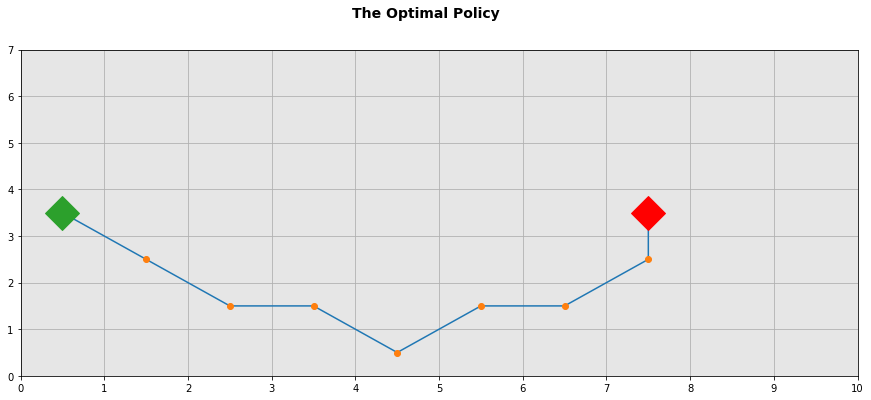


 The actions taken on that path are 
[(1, 0), (1, 0), (1, 1), (1, -1), (1, 1), (1, 0), (1, 0), (0, -1)]
________________________________________________________

The Total No. of Rewards :  -7
(No. of Episodes , Time to converge) (  [92]  ,  [5713]  )
________________________________________________________



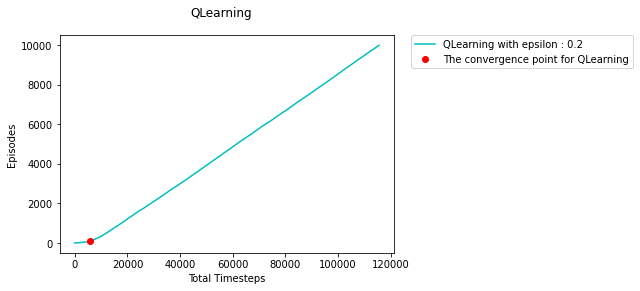

In [58]:
# Q-Learning with King's move
results_method(0.2, 0.2 ,Policy_ = 'QLearning', T_F_King_moves = True, episodes_range = 10000, line_ = '-c')

> **Notes on the previous cell** : 

> As we can see the agent converges after `92` episodes , with total time steps `5713` and gets total rewards = `-7`

> ### <a> <center> SARSA vs QLearning with King's move

Found the optimal policy using  sarsa  . The path is :
[(0, 3), (1, 3), (2, 2), (3, 1), (3, 0), (4, 1), (5, 1), (6, 1), (7, 2), (7, 3)]
________________________________________________________


 The actions taken on that path are 
[(1, 1), (1, 0), (1, -1), (0, -1), (1, 0), (1, 0), (1, 0), (1, 0), (0, -1)]
________________________________________________________

The Total No. of Rewards :  -8
(No. of Episodes , Time to converge) (  [208]  ,  [8732]  )
________________________________________________________

Found the optimal policy using  QLearning  . The path is :
[(0, 3), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 3), (7, 3)]
________________________________________________________


 The actions taken on that path are 
[(1, 0), (1, -1), (1, 1), (1, 0), (1, -1), (1, 1), (1, -1)]
________________________________________________________

The Total No. of Rewards :  -6
(No. of Episodes , Time to converge) (  [111]  ,  [4989]  )
________________________________________________________

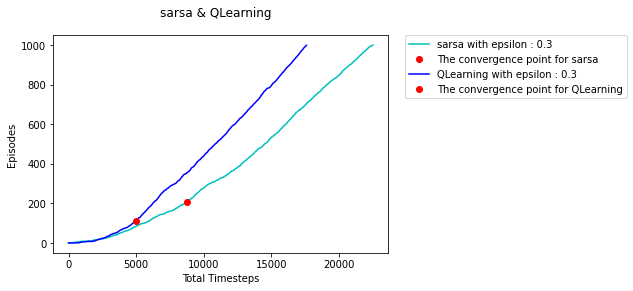

In [66]:
# SARSA & Q-Learning with King's move
results_method(0.4, 0.3 ,Policy_ = 'both', T_F_King_moves = True, episodes_range = 1000, line_ = '-c')

 >
  .               |SARSA              | Q-Learning 
-------------------|-------------------|------------------
No. of episodes    |   `208`             | `111` 
Total Timesteps    | `8732`             |   `4989` 
The Total Rewards    |   `-8`      | `-6` 



Found the optimal policy using  sarsa  . The path is :
[(0, 3), (1, 1), (2, 1), (3, 0), (4, 1), (5, 0), (6, 2), (7, 2), (7, 3)]
________________________________________________________


 The actions taken on that path are 
[(1, -1), (1, 0), (1, 0), (1, 0), (1, -1), (1, 1), (1, -1), (0, -1)]
________________________________________________________

The Total No. of Rewards :  -7
(No. of Episodes , Time to converge) (  [461]  ,  [10178]  )
________________________________________________________

Found the optimal policy using  QLearning  . The path is :
[(0, 3), (1, 2), (2, 1), (3, 0), (4, 0), (5, 2), (6, 2), (7, 3)]
________________________________________________________


 The actions taken on that path are 
[(1, -1), (1, 0), (1, -1), (1, 0), (1, 1), (1, -1), (1, 0)]
________________________________________________________

The Total No. of Rewards :  -6
(No. of Episodes , Time to converge) (  [133]  ,  [5127]  )
________________________________________________________



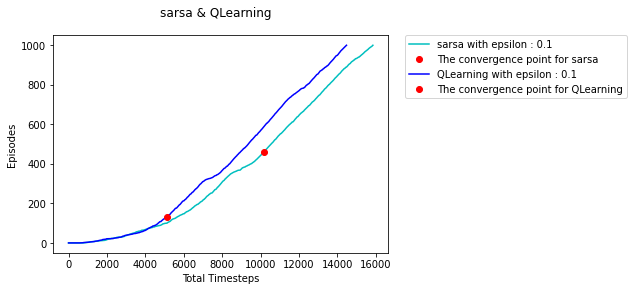

In [112]:
# SARSA & Q-Learning with King's move
results_method(0.4, 0.1 ,Policy_ = 'both', T_F_King_moves = True, episodes_range = 1000, line_ = '-c')

 >
  .               |SARSA              | Q-Learning 
-------------------|-------------------|------------------
No. of episodes    |   `461`             | `133` 
Total Timesteps    | `10178`             |   `5127` 
The Total Rewards    |   `-7`      | `-6` 



> **Notes on the previous cell** : 

> As we've seen, Sarsa and Q-learning find a quicker route thanks to the four new actions. 

> It shows in the graph, as the number of episodes terminated within ~5000 time steps has more than doubled.

> Again, Q-learning performs better than Sarsa by learning the optimal policy quicker.

> `ε = 0.1` is again better, as expected, though to a greater extent it seems than with only four possible actions. 

> This makes sense since learning the optimal policy with a higher ε takes longer and when choosing a non greedy action, the chance of picking the optimal one is now lower since there are more possible actions.

> ### <a> Conclusion

> We've implemented and compared the Sarsa and Q-learning algorithm on the Windy GridWorld environment.

> All in all, Q-learning performed better than Sarsa with equal ε (except in the schocastic wind case, Q-learning always did better even with varying ε).

> It would be interesting to try and compare other on-policy and off-policy algorithms on the Windy Gridworld environment, to see if off-policy algorithms always beat on-policy algorithms.

> The same could be said about trying and comparing Sarsa and Q-learning on other environments, to see if Q-learning always beats Sarsa.

# **<a>Resources.</a>**

There are a lot of resources, but these are among the most important sources that helped me and I learned from them.

**Note:** The code sources were mentioned to each cell separately.

> [On-Policy VS Off-Policy in Reinforcement Learning)](https://leimao.github.io/blog/RL-On-Policy-VS-Off-Policy/)

> [OpenAI gym Windy-Gridworlds](https://github.com/ibrahim-elshar/gym-windy-gridworlds)

> [On-policy vs. off-policy reinforcement learning](https://github.com/khaiyichin/teach_learn_notes/blob/ddd58af055571bb07c06688ba9ed3dbc57cb4021/rl/on_policy_vs_off_policy.ipynb)

> [Windy-Grid-World](https://github.com/vinhvu200/Windy-Grid-World/blob/master/Q-Learning.ipynb)

> [reinforcement-learning-an-introduction](https://github.com/vojtamolda/reinforcement-learning-an-introduction/tree/main/chapter06)

> [Saras, QLearning and Sarsa(λ) algorithms](https://programmersought.com/article/27077044249/)


> [Windy Gridworld: A simple implementation of Tabular RL(Sarsa and Q-learning)](https://blog.csdn.net/WZX_Hello/article/details/115560022)

> [sarsa: On-Policy TD Control)](http://incompleteideas.net/book/ebook/node64.html)





